# Notebook

1. [calling Gold mask and calculating map area]()
2. [DES + GOLD catalogs]()
3. [CMASS in des catalog]() 
4. [Assigning CMASS membership probability with XD algorithm](Assigning-CMASS-membership-probability-with-XD-algorithm )

In [1]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

##### Calling Gold mask and calculating map area

In [2]:
# calling map 
GoldMask = Cuts.limitingDepth(callingEliGoldMask())
GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 50, dec=-52, dec2 = -50)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
Spatial Cut  616479


##### DES + GOLD catalogs 

In [6]:
# calling gold + des catalog
merged_des_st82 = fitsio.read('result_cat/merged_des_st82.fits') # in stripe82
merged_des_patch = fitsio.read('result_cat/merged_des_patch.fits') # spt 0<ra<50, -52<dec<-50

In [4]:
# prior Cut
merged_des_st82_s, _ = priorCut( merged_des_st82 )
merged_des_s, _ = priorCut( merged_des_patch )

#check number density after prior Cut
n_spt = merged_des_s.size * 1./SPTMaparea
n_st82 = merged_des_st82_s.size * 1./ST82Maparea
print 'number density (patch, st82) ', n_spt, n_st82

prior cut  1565228
prior cut  690475


##### CMASS in des catalog 

In [7]:
# calling cmass
cmass = io.getSGCCMASSphotoObjcat()
cmass = Cuts.keepGoodRegion(cmass)
cmass = Cuts.SpatialCuts(cmass, ra=320, ra2=360, dec=-2, dec2=2)
m1, m2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], merged_des_st82['RA'], merged_des_st82['DEC'], 1./3600, maxmatch=1)
cmass_mask = np.zeros(merged_des_st82.size, dtype=bool)
cmass_mask[m2] = 1
clean_cmass_data_des, nocmass = merged_des_st82[cmass_mask], merged_des_st82[~cmass_mask]

Applying Healpix BOSS SGC footprint mask
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
Spatial Cut  12349


##### Assigning CMASS membership probability with XD algorithm 

In [8]:
# get cmass membership prob

# divide sample into train and test
(trainInd, testInd), _ = split_samples(merged_des_st82_s, merged_des_st82_s, [0.1,0.9], random_state=0)
des_train = merged_des_st82_s[trainInd]
#des_test = merged_des_st82_s[testInd]

prefix = 'gold_st82_20_'
result_gold_st82 = XDGMM_model(clean_cmass_data_des, clean_cmass_data_des, train=des_train, test=merged_des_st82_s, prefix = prefix )
result_gold_patch = XDGMM_model(clean_cmass_data_des, clean_cmass_data_des, train=des_train, test=merged_des_patch, prefix = prefix, spt=True )

prior cut  156522
prior cut  1565228
num of cmass in train 947  fraction  0.006050267694
train/test 156522 1565228
@pickle_results: using precomputed results from 'pickle/gold_st82_20_XD_all_tor.pkl'
@pickle_results: using precomputed results from 'pickle/gold_st82_20_XD_no_tor.pkl'
@pickle_results: using precomputed results from 'pickle/gold_st82_20_XD_cmass.pkl'
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
add noise to samples...


NameError: name 'merged_des' is not defined

----

## 1. g-r number density difference

In [7]:
# calling all gold catalogue
des_gold = io.getDESY1A1catalogs(keyword = 'Y1A1_GOLD_merged', gold=True)

Y1A1_GOLD_merged_01.fits
Y1A1_GOLD_merged_02.fits
Y1A1_GOLD_merged_03.fits
Y1A1_GOLD_merged_04.fits
Y1A1_GOLD_merged_05.fits
Y1A1_GOLD_merged_06.fits
Y1A1_GOLD_merged_07.fits
Y1A1_GOLD_merged_08.fits
Y1A1_GOLD_merged_09.fits
Y1A1_GOLD_merged_10.fits
Y1A1_GOLD_merged_11.fits
Y1A1_GOLD_merged_12.fits
Y1A1_GOLD_merged_13.fits
Y1A1_GOLD_merged_14.fits
Y1A1_GOLD_merged_15.fits
Y1A1_GOLD_merged_16.fits
Y1A1_GOLD_merged_17.fits
Y1A1_GOLD_merged_18.fits
Y1A1_GOLD_merged_19.fits
Y1A1_GOLD_merged_20.fits


MemoryError: 

In [6]:
des_gold = des_gold[des_gold['MODEST_CLASS'] == 1]

In [19]:
# reddening correction : 
mags = ['MAG_MODEL', 'MAG_DETMODEL', 'MAG_AUTO','MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']
des_gold = getCorrectedMag( des_gold, mags = mags, reddening = None )
des_gold_s, _ = priorCut(des_gold)

prior cut  25372986


/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [28]:
# reddening correction : 
#mags = ['MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']
#des_gold_s = getCorrectedMag( des_gold_s[0], mags = mags, reddening = None )

In [31]:
des_gold = 0
des_gold_s = Cuts.doBasicCuts(des_gold_s, raTag = 'RA', decTag='DEC', object = None)

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
no object selected. retrieve star + galaxy both
do Basic Cut 20089187


In [33]:
gr_mask = (((des_gold_s['MAG_DETMODEL_G_corrected'] - des_gold_s['MAG_DETMODEL_R_corrected']) > 1.3 ) &
           ((des_gold_s['MAG_DETMODEL_G_corrected'] - des_gold_s['MAG_DETMODEL_R_corrected']) < 1.8 ))
des_gold_s_gr = des_gold_s[gr_mask]
print des_gold_s_gr.size

4364333


figsave : figure/spatialtest_.png


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


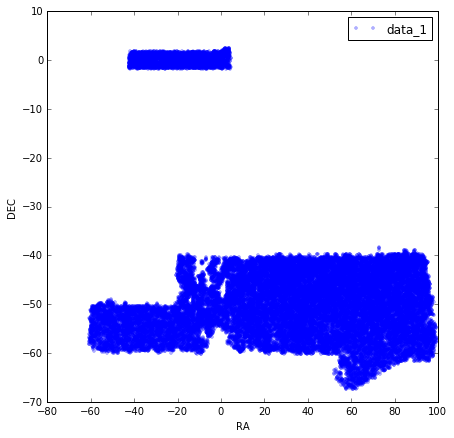

In [34]:
ind = np.random.choice(des_gold_s_gr.size, size=des_gold_s_gr.size * 0.01)
spatialcheck(des_gold_s_gr[ind])

In [72]:
# Healpixify
nside = 128
hpInd = hpRaDecToHEALPixel(des_gold_s_gr['RA'], des_gold_s_gr['DEC'], nside=nside, nest= False)
HmapPix = list(set(hpInd))
Apix = hp.nside2pixarea( nside, degrees = True)

In [73]:
import matplotlib.cm as cm

num_density = np.zeros(des_gold_s_gr.size)
for i, h in enumerate(HmapPix):
    cat = des_gold_s_gr[ hpInd == h ]
    num_density[ hpInd == h ] = cat.size*1./Apix

Spatial Cut  188679
fig save to  figure/num_density_gr.png


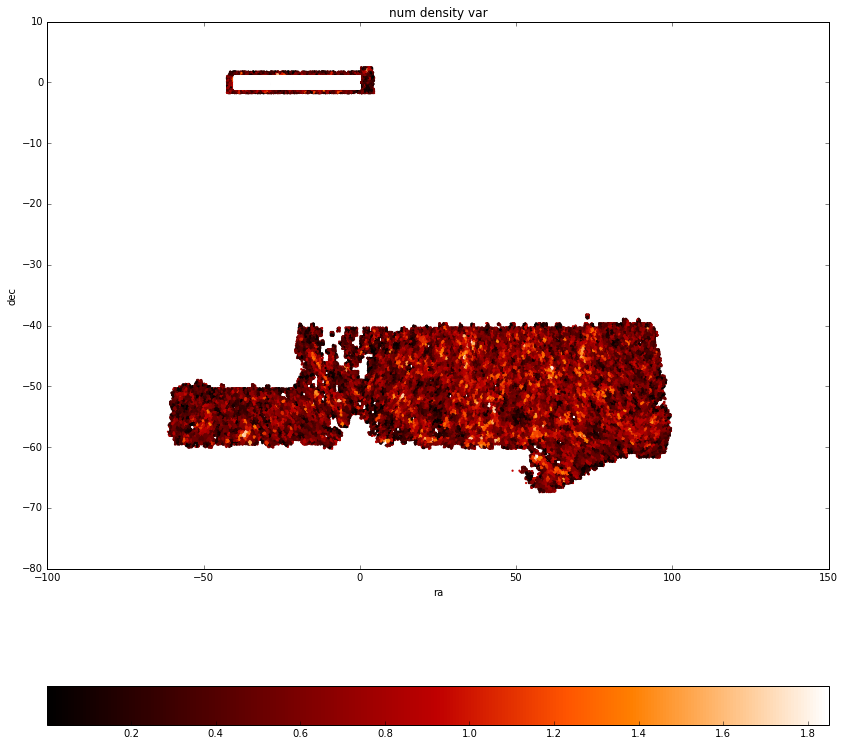

In [74]:
ind = np.random.choice(des_gold_s_gr.size, size=des_gold_s_gr.size/20)
catalog = des_gold_s_gr[ind]
catalog_st82 = Cuts.SpatialCuts(des_gold_s_gr, ra=320, ra2=360, dec=-1, dec2=1)
Nst82 = catalog_st82.size* 1./ST82Maparea

var = np.abs(num_density - Nst82)/Nst82

fig, ax = plt.subplots(1,1, figsize = (14,14))
ra = catalog['RA']
ra[catalog['RA'] > 180 ] = catalog['RA'][catalog['RA'] > 180 ] - 360
cax = ax.scatter( ra, catalog['DEC'], c = var[ind], s = 5, edgecolor='', cmap='gist_heat')

ra = catalog_st82['RA']
ra[catalog_st82['RA'] > 180 ] = catalog_st82['RA'][catalog_st82['RA'] > 180 ] - 360
cax2 = ax.scatter( ra, catalog_st82['DEC'], c = 'white', s = 5, edgecolor='')
#cax2 = ax2.scatter( ra, catalog['DEC'], c = var[ind], s = 5, edgecolor='', cmap='seismic', vmin = None, vmax = None)
fig.colorbar( cax, ax=ax, orientation = 'horizontal' )
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_title('num density var')
figname = 'figure/num_density_gr.png'
fig.savefig(figname)
print 'fig save to ', figname
#plt.close(fig)

variation : (data - st82)/st82

----

## NGMIX 

Calling ngmix catalog in stripe82

In [3]:
path = '/n/des/lee.5922/data/ngmix/'
keyword = 'sub2'
tables = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and keyword in i:
        tables.append(path+i)
        print i   
column = ['COADD_OBJECTS_ID', 'CM_MAG_G', 'CM_MAG_R', 'CM_MAG_I', \
          'CM_MAG_Z', 'CM_FLUX_S2N_G', 'CM_FLUX_S2N_R', 'CM_FLUX_S2N_I', 'CM_FLUX_S2N_Z']
#ngmix_cat_st82 = esutil.io.read(tables, columns = column, combine = True)
ngmix_cat_sub = esutil.io.read(tables, columns = column, combine = True)

NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000001.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000002.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000003.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000004.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000005.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000006.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000007.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000008.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000009.fits
NSEVILLA.NGMIX_MOF_Y1A1_WIDE_001_sub2_000010.fits


Calling CMASS catalog between ra 320 and 330

In [8]:
merged_des_ngmix = mergeCatalogsUsingPandas(des=des_gold, gold=ngmix_cat_sub, how = 'inner', key='COADD_OBJECTS_ID', suffixes = ['','_NGMIX'])

NameError: name 'des_gold' is not defined

ValueError: no field of name ALPHAWIN_J2000_DET

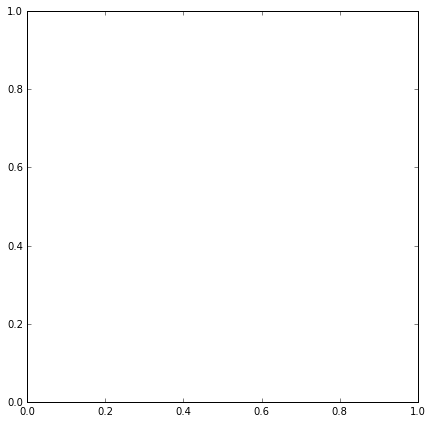

In [5]:
spatialcheck(merged_des_ngmix, suffix='ngmix_cat_sub')